In [13]:
pip install elapid # Install the elapid library using pip [Series of Species Distribution Modeling Tools for python which includes Implementation of Maxent Model with biogeography data]

In [14]:
pip install geopandas # Install the geopandas library using pip [We can use it to work with geospatial data]

In [15]:
pip install rasterio # Install the rasterio library using pip [We can use it to read and manipulate raster datasets]

In [16]:
import matplotlib.pyplot as plt # For Data Visualization
import rasterio as rio # for Geospatial Raster Data
import geopandas as gpd # for Geospatial Data, specifically Vector Data
import pandas as pd  # For Data Manipulation and Analysis Tool
import elapid as ela  # Species Distribution Modeling Tools
import rasterio.plot as rioplot # To Visualize Raster Data
import warnings # To Ignore all the Warning Messages
import os # To Load the Datasets/Files from the Specified Directory
import re # For Patterns, i.e., used to match and manipulate strings
from sklearn import metrics # For Evaluation Metrics (To assess the performance)

In [17]:
# PLot Preferences
plt.style.use('ggplot')

# Ignore the Warning Messages
warnings.filterwarnings("ignore")

# Define the color for barplots
pair_colors = ['#FFCC02', '#00458C']

In [18]:
# Mount Google Drive in Google Colab

from google.colab import drive
drive.mount('/content/drive')

# After mounting Google Drive, we can access files and directories within it

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# background data or raster
bio_clim='/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa island /island crop_chelsa_2011-2040'
#os path join to read background data
bioclimate_variables=[os.path.join(bio_clim,f) for f in os.listdir(bio_clim) if f.endswith(".tif")]
#bioclimate_variables

In [20]:
# Function to extract the Bioclimatic Variable Number from the path

def extract_number(path):
    # Extract the number using regular expression
    match = re.search(r'Bio_(\d+)', path)
    if match:
        return int(match.group(1))
    return 0

# Sort the paths based on the extracted number
sorted_paths = sorted(bioclimate_variables, key=extract_number)

# Print the sorted paths
for bioclimate_variables in sorted_paths:
    print(bioclimate_variables)

# Save the sorted paths in a list
bioclimate_variables = list(sorted_paths)

/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa island /island crop_chelsa_2011-2040/cropped_Bio_1_Annual_mean_Temperature_Chelsa_2011_2040.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa island /island crop_chelsa_2011-2040/cropped_Bio_2_Mean_Diurnal_Range_Chelsa_2011_2040.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa island /island crop_chelsa_2011-2040/cropped_Bio_3_Isothermality_Chelsa_2011_2040.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa island /island crop_chelsa_2011-2040/cropped_Bio_4_Temperature_Seasonality_2011_2040.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa island /island crop_chelsa_2011-2040/cropped_Bio_5_Maximum_Temperature_of_Warmest_Mont_Chelsa_2011_2040.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa island /island crop_chelsa_2011-2040/cropped_Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa_2011_2040.tif
/content/drive/MyDrive/Project_2/Insect Pest/tif 

In [21]:
# Add the Labels for Map
# Read the file path and split them, since we need only bioclim variables names

labels = []  # Initialize labels as an empty list
for i in bioclimate_variables:
    filename = os.path.basename(i)
    filename_without_extension = os.path.splitext(filename)[0]
    labels.append(filename_without_extension)
print(labels)

['cropped_Bio_1_Annual_mean_Temperature_Chelsa_2011_2040', 'cropped_Bio_2_Mean_Diurnal_Range_Chelsa_2011_2040', 'cropped_Bio_3_Isothermality_Chelsa_2011_2040', 'cropped_Bio_4_Temperature_Seasonality_2011_2040', 'cropped_Bio_5_Maximum_Temperature_of_Warmest_Mont_Chelsa_2011_2040', 'cropped_Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa_2011_2040', 'cropped_Bio_7_Temperature_Annual_Range_Chelsa_2011_2040', 'cropped_Bio_8_Mean_Temperature_of_Wettest_Quarte_Chelsa_2011_2040', 'cropped_Bio_9_Mean_Temperature_of_Driest_Quarter_Chelsa_2011_2040', 'cropped_Bio_10_Mean_Temperature_of_Warmest_Quarter_Chelsa_2011_2040', 'cropped_Bio_11_Mean_Temperature_of_Coldest_Quarter_Chelsa_2011_2040', 'cropped_Bio_12_Annual_Precipitation_Chelsa_2011_2040', 'cropped_Bio_13_Precipitation_of_Wettest_Month_Chelsa_2011_2040', 'cropped_Bio_14_Precipitation_of_Driest_Month_Chelsa_2011_2040', 'cropped_Bio_15_Precipitation_of_Seasonality_Chelsa_2011_2040', 'cropped_Bio_16_Precipitation_of_Wettest_Quarter_Chelsa_20

In [22]:
# Reading Bug Data (Species Data), also called as Presence data in the Geopackage File Format

# read the presence data, draw background point samples
presence = gpd.read_file('/content/drive/MyDrive/Project_2/Insect Pest/Species Data/GBIF Site/Diaprepes_abbreviatus(2012-2023).gpkg')

In [23]:
# Convert the 'ObsDate' column to datetime format
#bug_Presence_data['ObsDate'] = pd.to_datetime(bug_Presence_data['ObsDate'])

# Filter the data for the years 2011 to 2022
#presence = bug_Presence_data[(bug_Presence_data['ObsDate'].dt.year >= 1995) & (bug_Presence_data['ObsDate'].dt.year <= 2023)]
presence.head()


,scientific,locality,occurrence,latitude,longitude,day,month,Year,geometry
0,"Diaprepes abbreviatus (Linnaeus""",US,Florida,26.082689,-80.237779,2023-06-13T14:26:00,13,2023,POINT (-80.23778 26.08269)
1,"Diaprepes abbreviatus (Linnaeus""",US,Florida,28.813627,-81.324068,2017-07-16T21:08:14,16,2017,POINT (-81.32407 28.81363)
2,"Diaprepes abbreviatus (Linnaeus""",US,Texas,29.755168,-95.417309,2023-06-13T14:25:09,13,2023,POINT (-95.41731 29.75517)
3,"Diaprepes abbreviatus (Linnaeus""",US,Texas,29.958864,-95.562072,2023-06-12T16:13:37,12,2023,POINT (-95.56207 29.95886)
4,"Diaprepes abbreviatus (Linnaeus""",US,Texas,29.584945,-95.031163,2023-06-11T14:35:33,11,2023,POINT (-95.03116 29.58495)


# Bio_1_Annual_mean_Temperature_Chelsa_2011_2040

In [24]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[0], count=10_000)
background.head()

0    POINT (-83.26683 30.32223)
1    POINT (-71.55850 18.85557)
2    POINT (-81.03350 22.88890)
3    POINT (-81.80850 29.53057)
4    POINT (-70.17517 19.16390)
dtype: geometry

In [25]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [26]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

,geometry,class,b01,b02,b03,b04,b05,b06,b07,b08,...,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19
0,POINT (-80.23778 26.08269),1,2982,58,4,3039,3048,2909,139,3010,...,3017,2941,14872,2536,435,559,6458,1554,6309,1641
1,POINT (-81.32407 28.81363),1,2955,92,4,4685,3057,2845,212,3007,...,3011,2891,13951,2321,514,559,6349,1863,6188,1935
2,POINT (-80.29333 26.26842),1,2980,80,4,3343,3062,2893,169,3018,...,3018,2935,14886,2402,438,560,6421,1478,5987,1556
3,POINT (-67.00231 18.48922),1,2995,44,5,1143,3035,2958,77,3006,...,3009,2980,21912,2749,753,357,7542,2871,6781,2871
4,POINT (-65.86452 18.28092),1,2967,48,5,1370,3008,2924,84,2974,...,2983,2948,28093,3190,1249,267,8708,4399,8138,4399


In [27]:
# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [28]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [29]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model1c.ela')

Training AUC score: 0.939


In [30]:
# Write the model predictions to disk
output_raster1 = 'Annual_mean_Temperature_Chelsa_Prediction_2011-2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster1, quiet=True)

# and read into memory
with rio.open(output_raster1, 'r') as src:
    pred = src.read(1, masked=True)

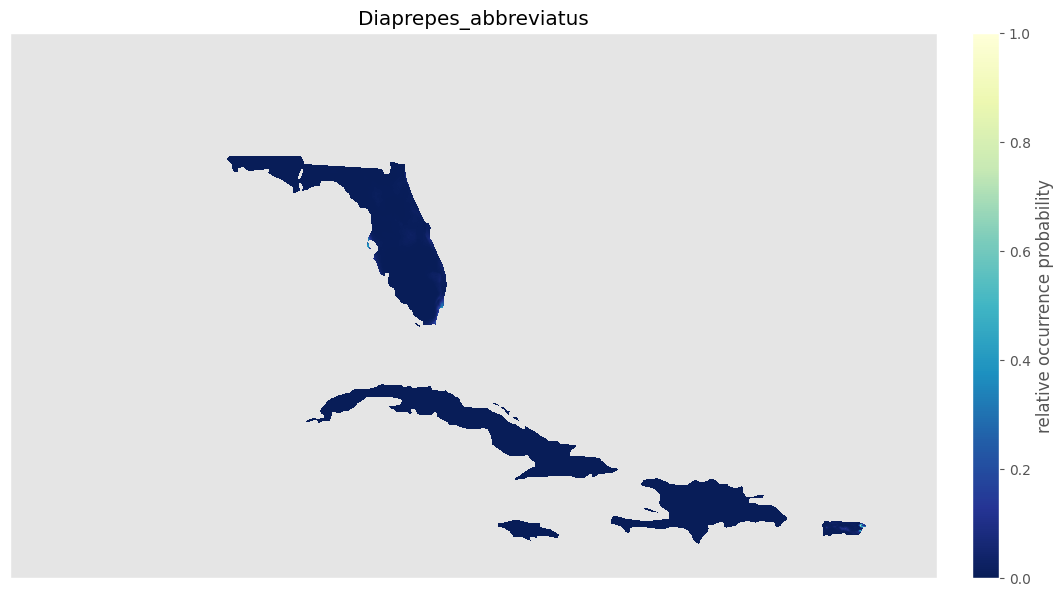

In [31]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot1 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar1 = plt.colorbar(plot1, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [32]:
# Save the colorbar as a TIFF file
colorbar_file1 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Annual_mean_Temperature_Chelsa_Prediction_2011-2040.tif'
cbar1.ax.figure.savefig(colorbar_file1, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_2_Mean_Diurnal_Range_Chelsa_2011_2040.tif

In [33]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[1], count=10_000)
background.head()

0    POINT (-80.58350 22.58890)
1    POINT (-74.70017 20.26390)
2    POINT (-66.00850 18.28890)
3    POINT (-81.43350 22.73890)
4    POINT (-70.90850 18.44723)
dtype: geometry

In [34]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [35]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [36]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [37]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.945


In [38]:
# Save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model2c.ela')

# Write the model predictions to disk
output_raster2 = 'Mean_Diurnal_Range_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster2, quiet=True)

In [39]:
# Read into memory
with rio.open(output_raster2, 'r') as src:
    pred = src.read(1, masked=True)

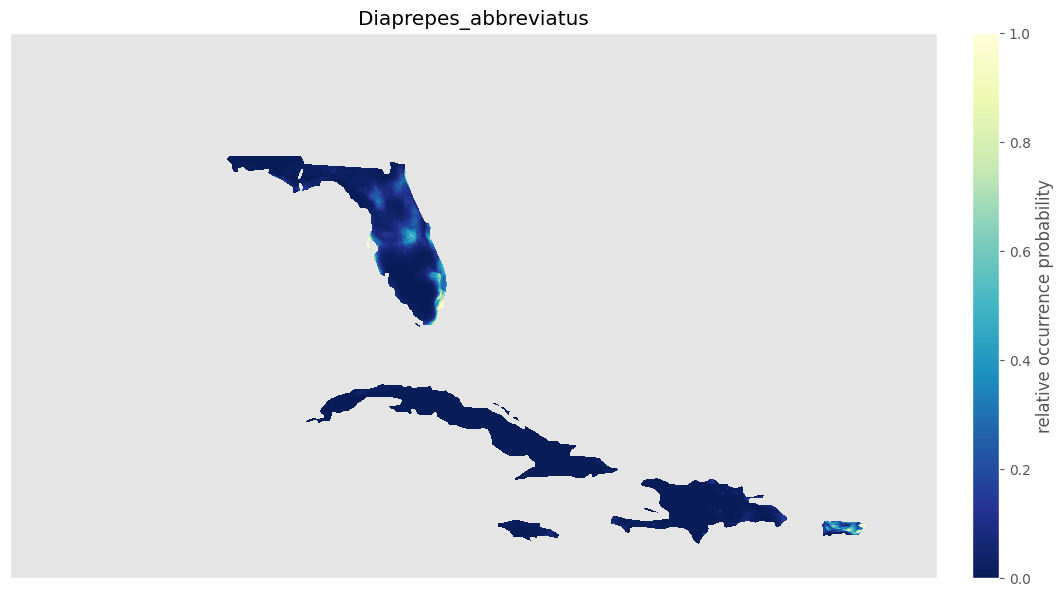

In [40]:
# Plot the Suitability Predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot2 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar2 = plt.colorbar(plot2, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [41]:
# Save the colorbar as a TIFF file
colorbar_file2 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Mean_Diurnal_Range_Chelsa_Prediction_2011_2040.tif'
cbar2.ax.figure.savefig(colorbar_file2, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_3_Isothermality_Chelsa_2011_2040.tif

In [42]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[2], count=10_000)
background.head()

0    POINT (-91.35017 22.53057)
1    POINT (-73.90017 33.79723)
2    POINT (-71.30850 17.28890)
3    POINT (-71.28350 20.88057)
4    POINT (-68.51683 19.53890)
dtype: geometry

In [43]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [44]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [45]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [46]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.982


In [47]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model3c.ela')

# Write the model predictions to disk
output_raster3 = 'Isothermality_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster3, quiet=True)

In [48]:
# Read into memory
with rio.open(output_raster3, 'r') as src:
    pred = src.read(1, masked=True)

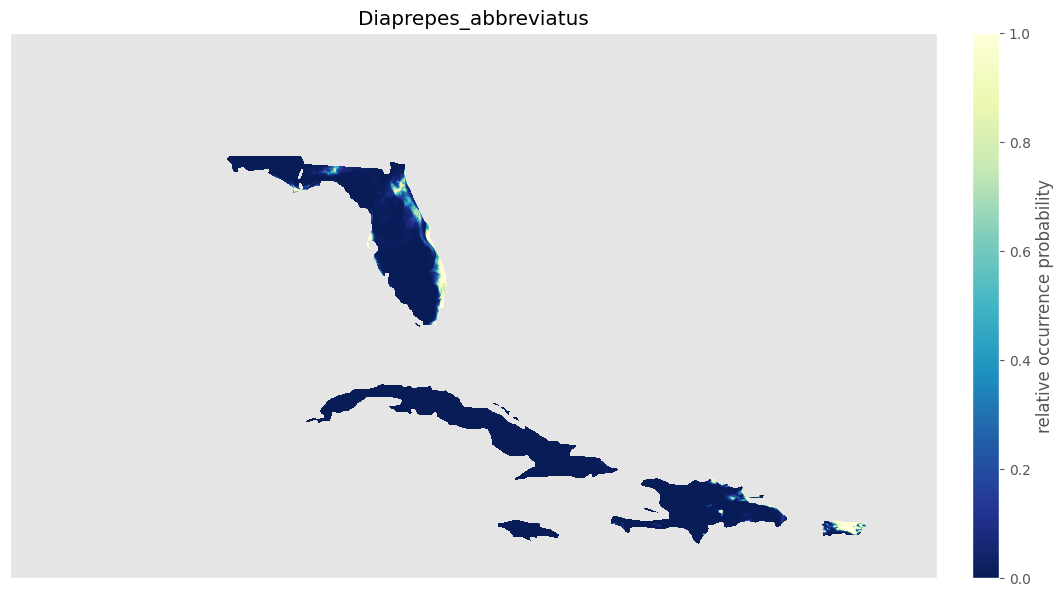

In [49]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot3 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar3 = plt.colorbar(plot3, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [50]:
# Save the colorbar as a TIFF file
colorbar_file3 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Isothermality_Chelsa_Prediction_2011_2040.tif'
cbar3.ax.figure.savefig(colorbar_file3, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_4_Temperature_Seasonality_Chelsa_2011_2040.tif

In [51]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[3], count=10_000)
background.head()

0    POINT (-68.46683 18.48057)
1    POINT (-76.52517 21.23890)
2    POINT (-69.82517 18.61390)
3    POINT (-81.08350 22.85557)
4    POINT (-80.38350 25.18890)
dtype: geometry

In [52]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [53]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [54]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [55]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.944


In [56]:
# Save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model4c.ela')

# Write the model predictions to disk
output_raster4 = 'Temperature_Seasonality_Chelsa_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster4, quiet=True)

In [57]:
# Read into memory
with rio.open(output_raster4, 'r') as src:
    pred = src.read(1, masked=True)


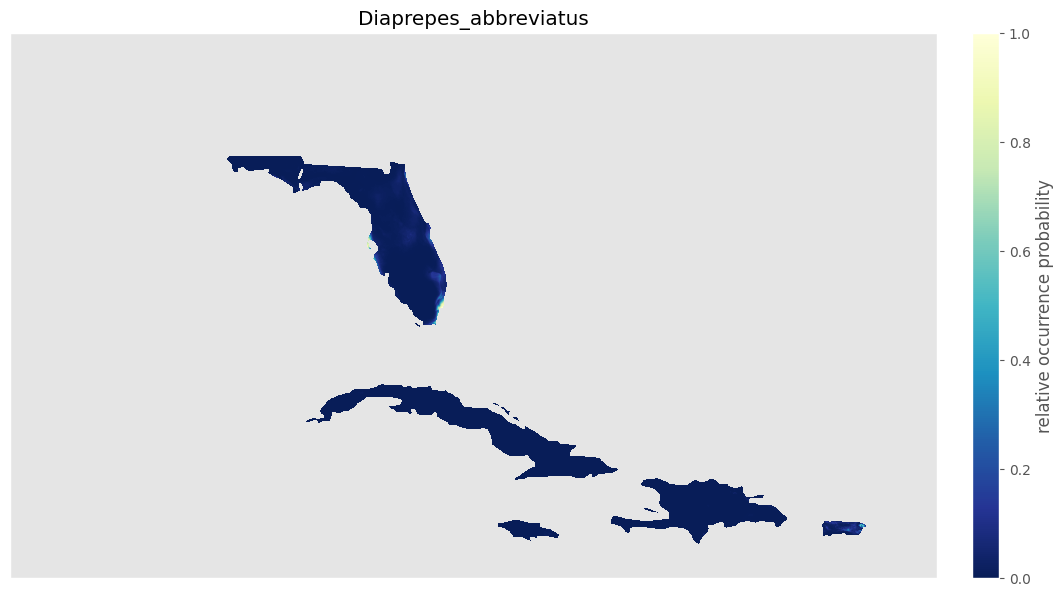

In [58]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot4 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar4 = plt.colorbar(plot4, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [59]:
# Save the colorbar as a TIFF file
colorbar_file4 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Temperature_Seasonality_Chelsa_2011_2040.tif'
cbar4.ax.figure.savefig(colorbar_file4, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_5_Maximum_Temperature_of_Warmest_Month_Chelsa_2011_2040.tif

In [60]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[4], count=10_000)
background.head()

0    POINT (-80.80850 25.37223)
1    POINT (-78.35850 21.41390)
2    POINT (-82.79183 29.86390)
3    POINT (-79.81683 22.36390)
4    POINT (-77.00017 18.38890)
dtype: geometry

In [61]:
# Merge Datasets and Read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [62]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [63]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [64]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.942


In [65]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model5c.ela')

#Write the model predictions to disk
output_raster5 = 'Maximum_Temperature_of_Warmest_Month_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster5, quiet=True)

In [66]:
# Read into memory
with rio.open(output_raster5, 'r') as src:
    pred = src.read(1, masked=True)


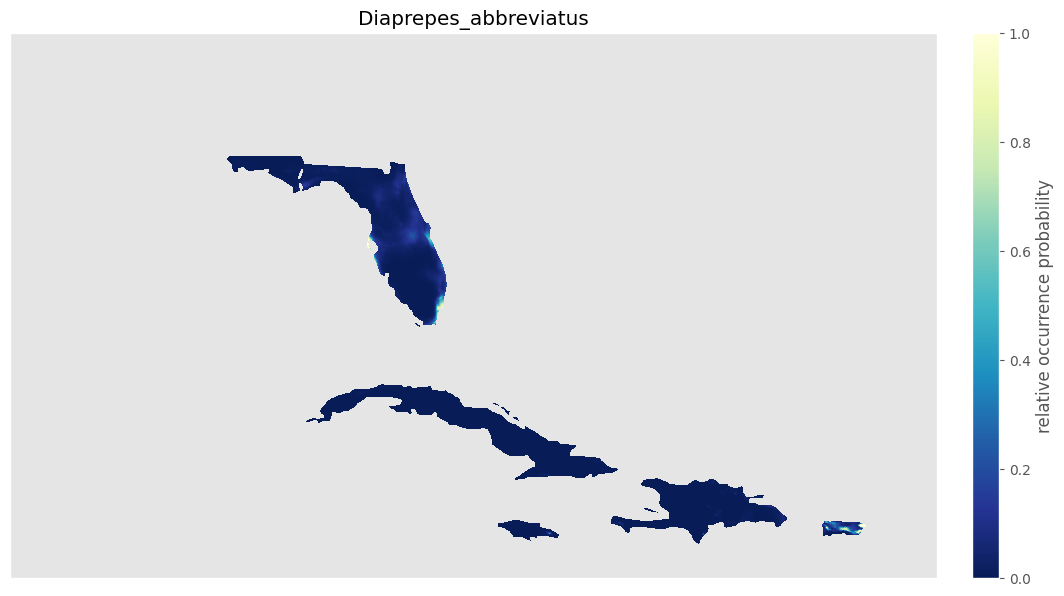

In [67]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot5 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar5 = plt.colorbar(plot5, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [68]:
# Save the colorbar as a TIFF file
colorbar_file5 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Maximum_Temperature_of_Warmest_Month_Chelsa_Prediction_2011_2040.tif'
cbar5.ax.figure.savefig(colorbar_file5, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa_2011_2040.tif


In [69]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[5], count=10_000)
background.head()

0    POINT (-80.88350 26.13057)
1    POINT (-77.61683 17.91390)
2    POINT (-67.00017 18.37223)
3    POINT (-66.55850 18.33057)
4    POINT (-84.51683 30.26390)
dtype: geometry

In [70]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [71]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [72]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [73]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.942


In [74]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model6c.ela')

# Write the model predictions to disk
output_raster6 = 'Minimum_Temperature_of_Coldest_Month_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster6, quiet=True)

In [75]:
# Read into memory
with rio.open(output_raster6, 'r') as src:
    pred = src.read(1, masked=True)


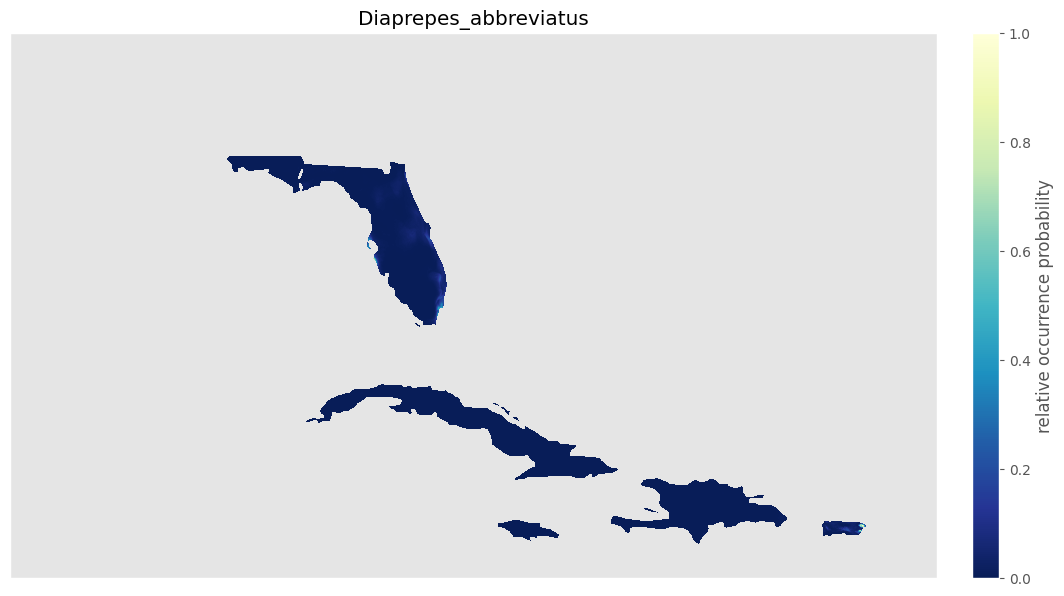

In [76]:
 # Plot the Suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot6 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar6 = plt.colorbar(plot6, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [77]:
# Save the colorbar as a TIFF file
colorbar_file6= '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Minimum_Temperature_of_Coldest_Month_Chelsa_Prediction_2011_2040.tif'
cbar6.ax.figure.savefig(colorbar_file6, format='tiff')

# Close the figure to free up memory
plt.close(fig)

In [78]:
#Bio_7_Temperature_Annual_Range_Chelsa_2011_2040

In [79]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[6], count=10_000)
background.head()

0    POINT (-78.05017 21.53890)
1    POINT (-81.94183 27.96390)
2    POINT (-76.58350 20.56390)
3    POINT (-85.69183 30.34723)
4    POINT (-76.86683 19.99723)
dtype: geometry

In [80]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [81]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [82]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [83]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.943


In [84]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model7c.ela')

# Write the model predictions to disk
output_raster7 = 'Temperature_Annual_Range_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster7, quiet=True)

In [85]:
# Read into memory
with rio.open(output_raster7, 'r') as src:
    pred = src.read(1, masked=True)


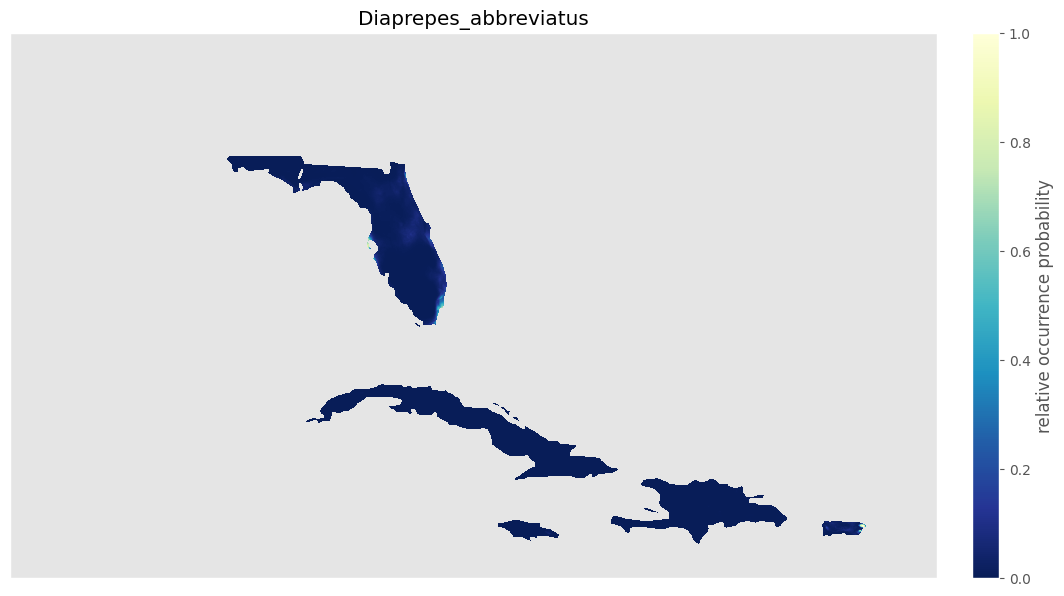

In [86]:

# Plot the Suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot7 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar7 = plt.colorbar(plot7, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [87]:
# Save the colorbar as a TIFF file
colorbar_file7 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Temperature_Annual_Range_Chelsa_Prediction_2011_2040.tif'
cbar7.ax.figure.savefig(colorbar_file7, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_8_Mean_Temperature_of_Wettest_Quarter_Chelsa_2011_2040.tif

In [88]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[7], count=10_000)
background.head()

0    POINT (-67.92517 27.54723)
1    POINT (-81.70850 31.94723)
2    POINT (-73.17517 17.24723)
3    POINT (-78.64183 18.23890)
4    POINT (-71.51683 23.16390)
dtype: geometry

In [89]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [90]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [91]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [92]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.981


In [93]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model8c.ela')

# Write the model predictions to disk
output_raster8 = 'Mean_Temperature_of_Wettest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster8, quiet=True)

In [94]:
# Read into memory
with rio.open(output_raster8, 'r') as src:
    pred = src.read(1, masked=True)


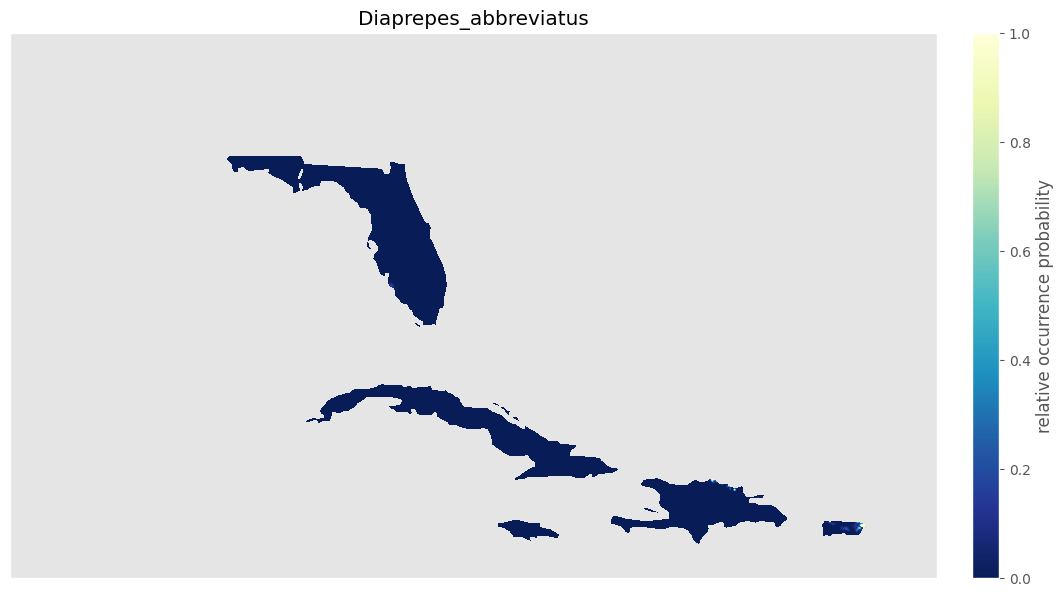

In [95]:
   # Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot8 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar8 = plt.colorbar(plot8, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [96]:
# Save the colorbar as a TIFF file
colorbar_file1 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Mean_Temperature_of_Wettest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar1.ax.figure.savefig(colorbar_file1, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_9_Mean_Temperature_of_Driest_Quarter_Chelsa_2011_2040.tif

In [97]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[8], count=10_000)
background.head()

0    POINT (-74.44183 23.63057)
1    POINT (-75.00017 20.69723)
2    POINT (-77.44183 17.34723)
3    POINT (-68.90017 25.38890)
4    POINT (-83.18350 23.79723)
dtype: geometry

In [98]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [99]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [100]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [101]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.975


In [102]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model9c.ela')

# Write the model predictions to disk
output_raster9 = 'Mean_Temperature_of_Driest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster9, quiet=True)

# Read into memory
with rio.open(output_raster9, 'r') as src:
    pred = src.read(1, masked=True)


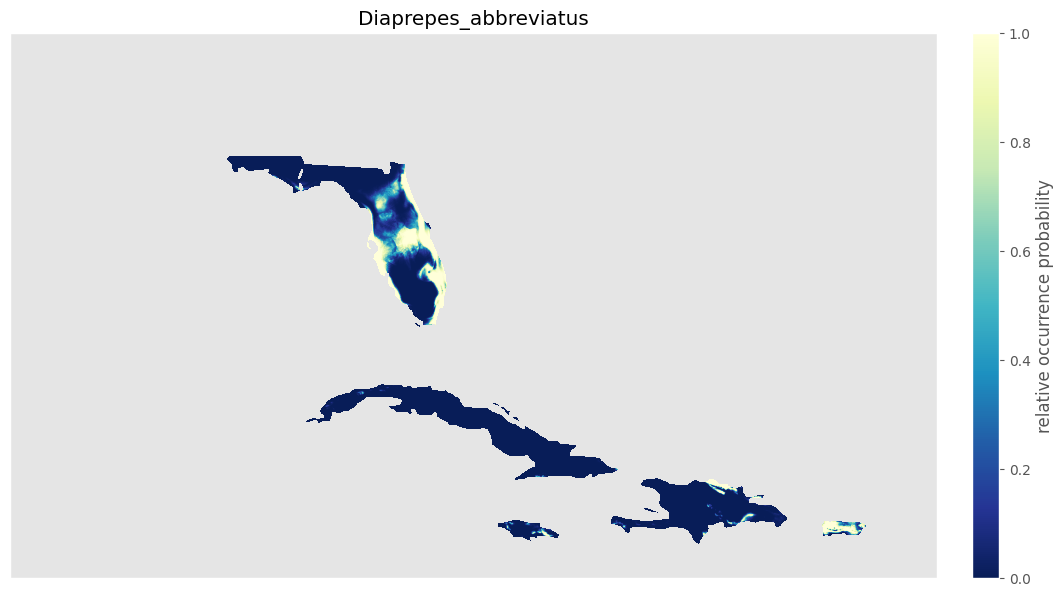

In [103]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot9 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar9 = plt.colorbar(plot9, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [104]:
# Save the colorbar as a TIFF file
colorbar_file9 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Mean_Temperature_of_Driest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar9.ax.figure.savefig(colorbar_file9, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_10_Mean_Temperature_of_Warmest_Quarter_Chelsa_2011_2040.tif

In [105]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[9], count=10_000)
background.head()

0    POINT (-83.12517 21.48890)
1    POINT (-78.86683 21.07223)
2    POINT (-71.45850 26.09723)
3    POINT (-67.98350 34.91390)
4    POINT (-83.12517 33.00557)
dtype: geometry

In [106]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [107]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [108]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [109]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.985


In [110]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model10c.ela')

# Write the model predictions to disk
output_raster10 = 'Mean_Temperature_of_Warmest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster10, quiet=True)

# Read into memory
with rio.open(output_raster10, 'r') as src:
    pred = src.read(1, masked=True)


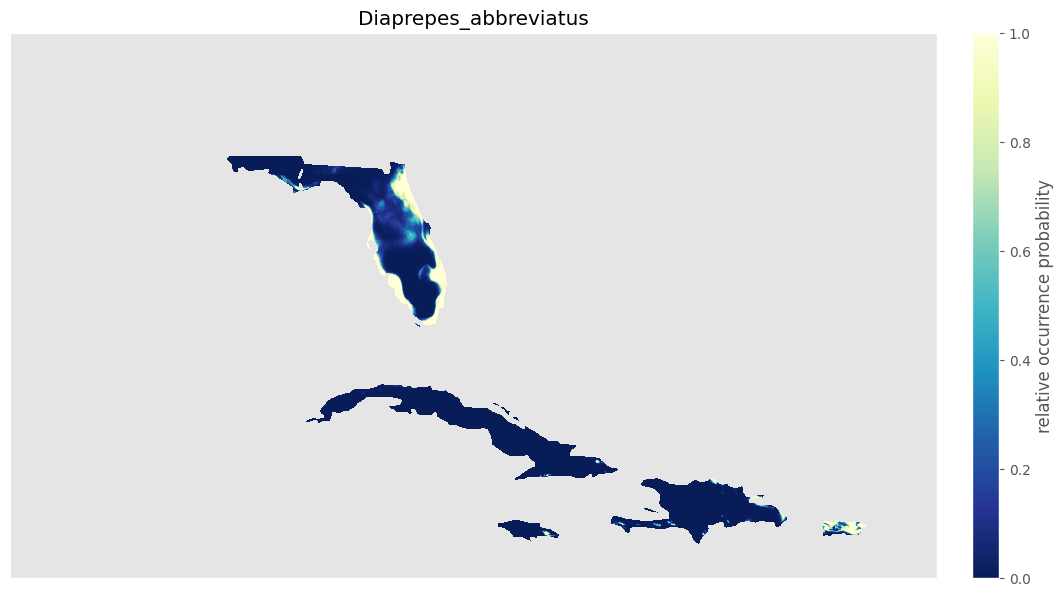

In [111]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot10 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar10 = plt.colorbar(plot10, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [112]:
# Save the colorbar as a TIFF file
colorbar_file10 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Mean_Temperature_of_Warmest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar10.ax.figure.savefig(colorbar_file10, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_11_Mean_Temperature_of_Coldest_Quarter_Chelsa_2011_2040.tif

In [113]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[10], count=10_000)
background.head()

0    POINT (-94.42517 34.51390)
1    POINT (-67.60017 34.81390)
2    POINT (-88.40017 27.13057)
3    POINT (-87.10017 20.23057)
4    POINT (-89.80017 25.52223)
dtype: geometry

In [114]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [115]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [116]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [117]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.983


In [118]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model11c.ela')

# Write the model predictions to disk
output_raster11 = 'Mean_Temperature_of_Coldest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster11, quiet=True)

# Read into memory
with rio.open(output_raster11, 'r') as src:
    pred = src.read(1, masked=True)

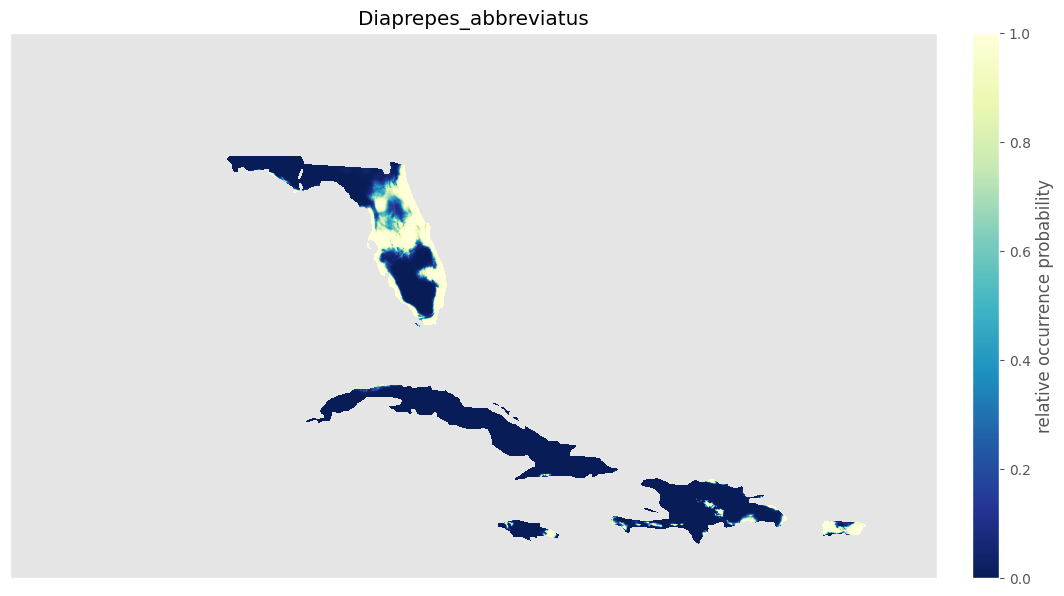

In [119]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot11 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar11 = plt.colorbar(plot11, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [120]:
# Save the colorbar as a TIFF file
colorbar_file11 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Mean_Temperature_of_Coldest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar11.ax.figure.savefig(colorbar_file11, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_12_Annual_Precipitation_Chelsa_2011_2040.tif

In [121]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[11], count=10_000)
background.head()

0    POINT (-77.36683 18.08057)
1    POINT (-81.05017 23.00557)
2    POINT (-70.81683 18.83890)
3    POINT (-82.15017 29.60557)
4    POINT (-70.12517 18.83890)
dtype: geometry

In [122]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [123]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [124]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [125]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.945


In [126]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model10c.ela')

# Write the model predictions to disk
output_raster12 = 'Annual_Precipitation_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster12, quiet=True)

# Read into memory
with rio.open(output_raster12, 'r') as src:
    pred = src.read(1, masked=True)


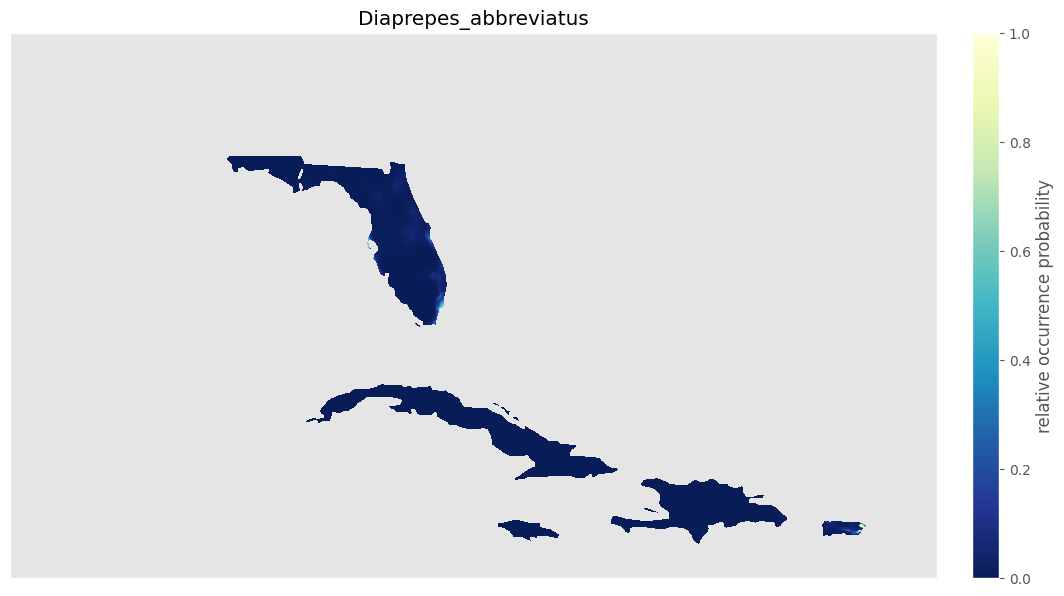

In [127]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot12 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar12 = plt.colorbar(plot12, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [128]:
# Save the colorbar as a TIFF file
colorbar_file12 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Annual_Precipitation_Chelsa_Prediction_2011_2040.tif'
cbar12.ax.figure.savefig(colorbar_file12, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_13_Precipitation_of_Wettest_Month_Chelsa_2011_2040.tif

In [129]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[12], count=10_000)
background.head()

0    POINT (-81.25850 27.65557)
1    POINT (-76.78350 20.09723)
2    POINT (-81.59183 26.71390)
3    POINT (-81.59183 27.53890)
4    POINT (-72.41683 18.28890)
dtype: geometry

In [130]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [131]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [132]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [133]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.943


In [134]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model13c.ela')

# Write the model predictions to disk
output_raster13 = 'Precipitation_of_Wettest_Month_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster13, quiet=True)

# Read into memory
with rio.open(output_raster13, 'r') as src:
    pred = src.read(1, masked=True)


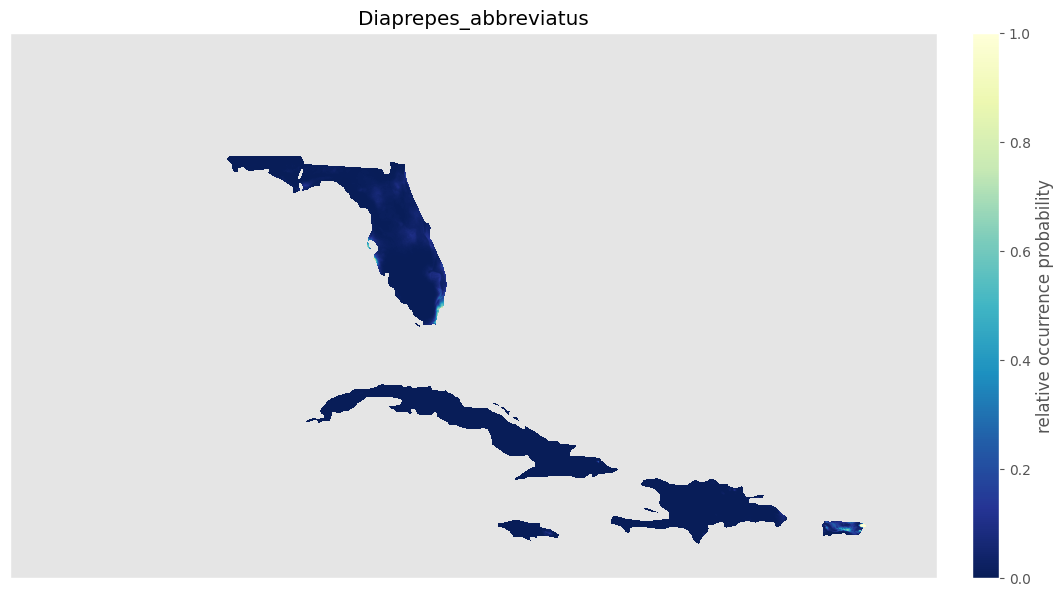

In [135]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot13 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar13 = plt.colorbar(plot13, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [136]:
# Save the colorbar as a TIFF file
colorbar_file13 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Precipitation_of_Wettest_Month_Chelsa_Prediction_2011_2040.tif'
cbar1.ax.figure.savefig(colorbar_file13, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_14_Precipitation_of_Driest_Month_Chelsa_2011_2040.tif

In [137]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[13], count=10_000)
background.head()

0    POINT (-84.19183 22.49723)
1    POINT (-82.35850 30.28057)
2    POINT (-76.41683 20.36390)
3    POINT (-84.50850 30.30557)
4    POINT (-76.92517 21.26390)
dtype: geometry

In [138]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [139]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [140]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [141]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.944


In [142]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model14c.ela')

# Write the model predictions to disk
output_raster14 = 'Precipitation_of_Driest_Month_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster14, quiet=True)

# Read into memory
with rio.open(output_raster14, 'r') as src:
    pred = src.read(1, masked=True)


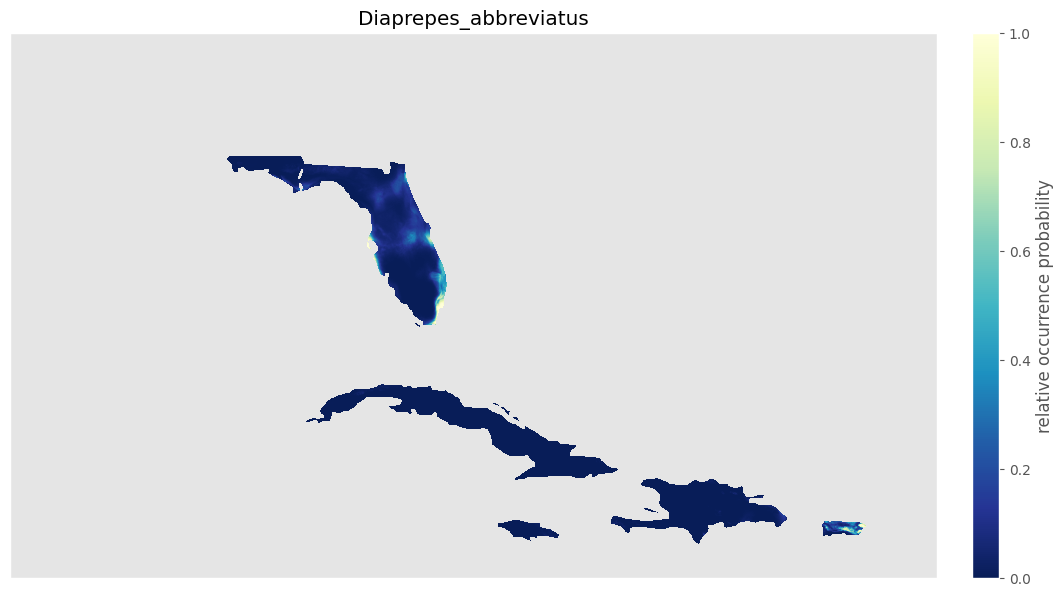

In [143]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot14 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar14 = plt.colorbar(plot14, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [144]:
# Save the colorbar as a TIFF file
colorbar_file14 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Precipitation_of_Driest_Month_Chelsa_Prediction_2011_2040.tif'
cbar14.ax.figure.savefig(colorbar_file14, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_15_Precipitation_of_Seasonality_Chelsa_2011_2040.tif

In [145]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[14], count=10_000)
background.head()

0    POINT (-84.08350 22.71390)
1    POINT (-82.92517 24.73057)
2    POINT (-76.99183 34.05557)
3    POINT (-64.32517 18.03890)
4    POINT (-76.88350 34.88890)
dtype: geometry

In [146]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [147]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [148]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [149]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.977


In [150]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model15c.ela')

# write the model predictions to disk
output_raster15 = 'Precipitation_of_Seasonality_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster15, quiet=True)

# Read into memory
with rio.open(output_raster15, 'r') as src:
    pred = src.read(1, masked=True)


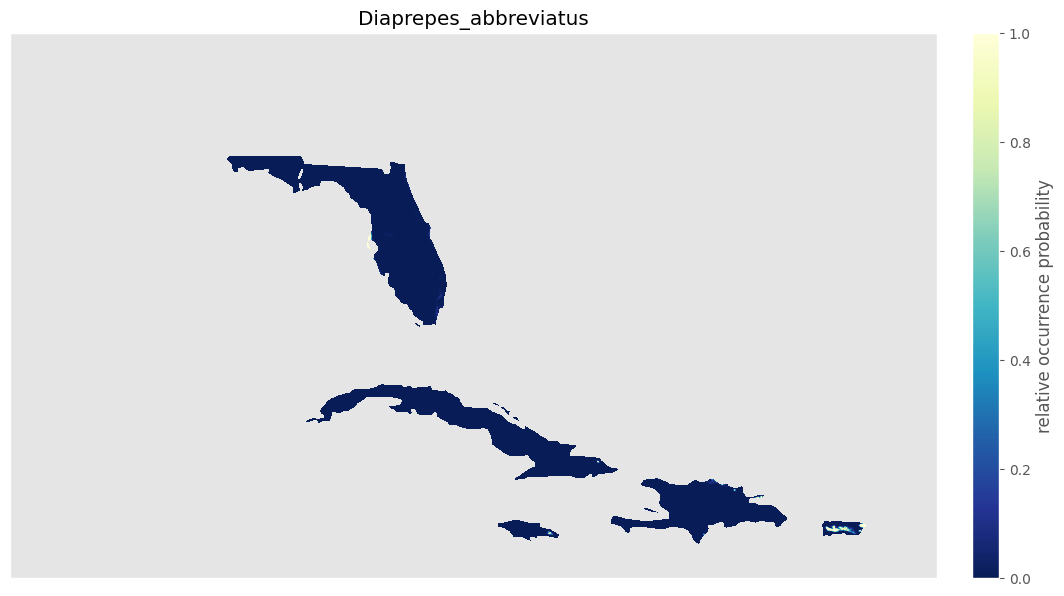

In [151]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot15 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar15 = plt.colorbar(plot15, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [152]:
# Save the colorbar as a TIFF file
colorbar_file15 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Precipitation_of_Seasonality_Chelsa_Prediction_2011_2040.tif'
cbar15.ax.figure.savefig(colorbar_file15, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_16_Precipitation_of_Wettest_Quarter_Chelsa_2011_2040.tif

In [153]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[15], count=10_000)
background.head()

0    POINT (-68.20850 34.09723)
1    POINT (-70.76683 27.03057)
2    POINT (-89.81683 21.95557)
3    POINT (-77.55017 16.88057)
4    POINT (-63.33350 25.66390)
dtype: geometry

In [154]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [155]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [156]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [157]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.978


In [158]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model16c.ela')

# Write the model predictions to disk
output_raster16 = 'Precipitation_of_Wettest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster16, quiet=True)

# Read into memory
with rio.open(output_raster16, 'r') as src:
    pred = src.read(1, masked=True)


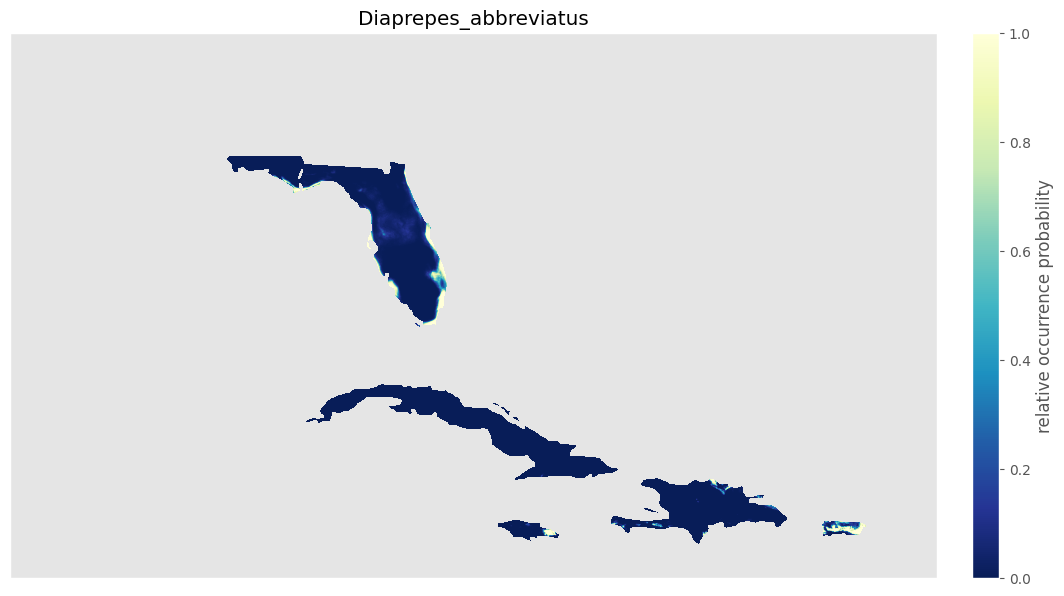

In [159]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot16 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar16 = plt.colorbar(plot16, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [160]:
# Save the colorbar as a TIFF file
colorbar_file16 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Precipitation_of_Wettest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar1.ax.figure.savefig(colorbar_file16, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_17_Precipitation_of_Driest_Quarter_Chelsa_2011_2040.tif

In [161]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[16], count=10_000)
background.head()

0    POINT (-86.60017 25.86390)
1    POINT (-87.71683 32.63890)
2    POINT (-91.69183 35.14723)
3    POINT (-70.19183 17.55557)
4    POINT (-82.32517 25.76390)
dtype: geometry

In [162]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [163]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [164]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [165]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.974


In [166]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model17c.ela')

# Write the model predictions to disk
output_raster17 = 'Precipitation_of_Driest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster17, quiet=True)

# Read into memory
with rio.open(output_raster17, 'r') as src:
    pred = src.read(1, masked=True)


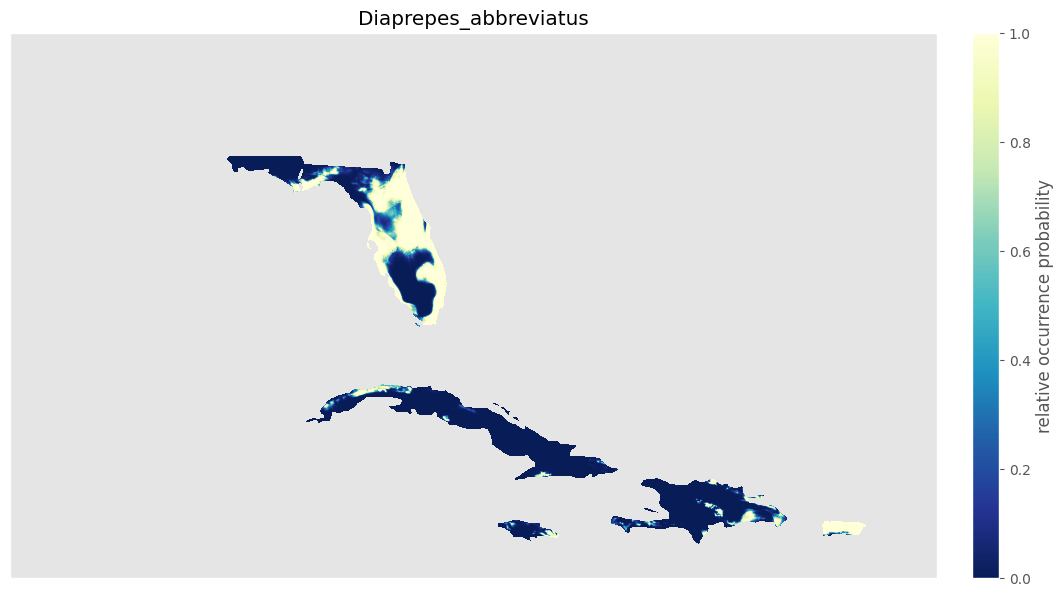

In [167]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot17 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar17 = plt.colorbar(plot17, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [168]:
# Save the colorbar as a TIFF file
colorbar_file17 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Precipitation_of_Driest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar17.ax.figure.savefig(colorbar_file17, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_18_Precipitation_of_Warmest_Quarter_Chelsa_2011_2040.tif

In [169]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[17], count=10_000)
background.head()

0    POINT (-66.44183 19.38890)
1    POINT (-80.08350 29.60557)
2    POINT (-81.62517 27.58057)
3    POINT (-74.65017 32.73057)
4    POINT (-91.76683 28.57223)
dtype: geometry

In [170]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [171]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [172]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [173]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.976


In [174]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model18c.ela')

# Write the model predictions to disk
output_raster18 = 'Precipitation_of_Warmest_Quarter_Chelsa_Prediction_2011_2040.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster18, quiet=True)

# Read into memory
with rio.open(output_raster18, 'r') as src:
    pred = src.read(1, masked=True)


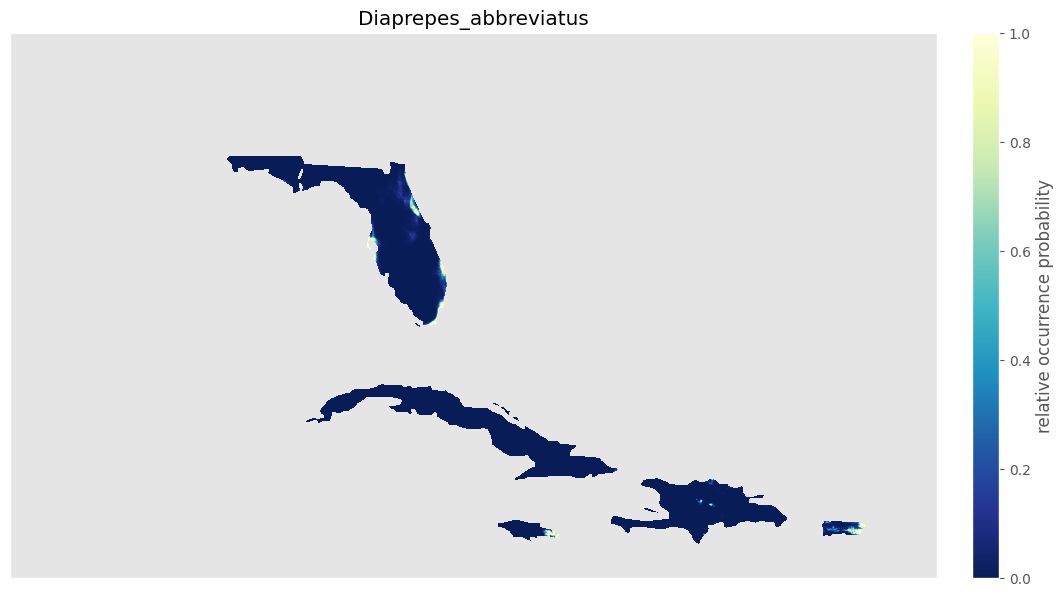

In [175]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot18 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar18 = plt.colorbar(plot18, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [176]:
# Save the colorbar as a TIFF file
colorbar_file18 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Precipitation_of_Warmest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar18.ax.figure.savefig(colorbar_file18, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_19_Precipitation_of_Coldest_Quarter_Chelsa_2011_2040.tif

In [177]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[18], count=10_000)
background.head()

0    POINT (-87.80017 34.73890)
1    POINT (-73.59183 17.44723)
2    POINT (-65.50850 22.13890)
3    POINT (-78.95850 29.87223)
4    POINT (-67.12517 22.78057)
dtype: geometry

In [178]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [179]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [180]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [181]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.975


In [182]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model19c.ela')

# Write the model predictions to disk
output_raster19 = 'Precipitation_of_Coldest_Quarter_Chelsa_Prediction_2011_2040.tif'

#Applies a trained model to a list of raster datasets
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster19, quiet=True)

# Read into memory
with rio.open(output_raster19, 'r') as src:
    pred = src.read(1, masked=True)


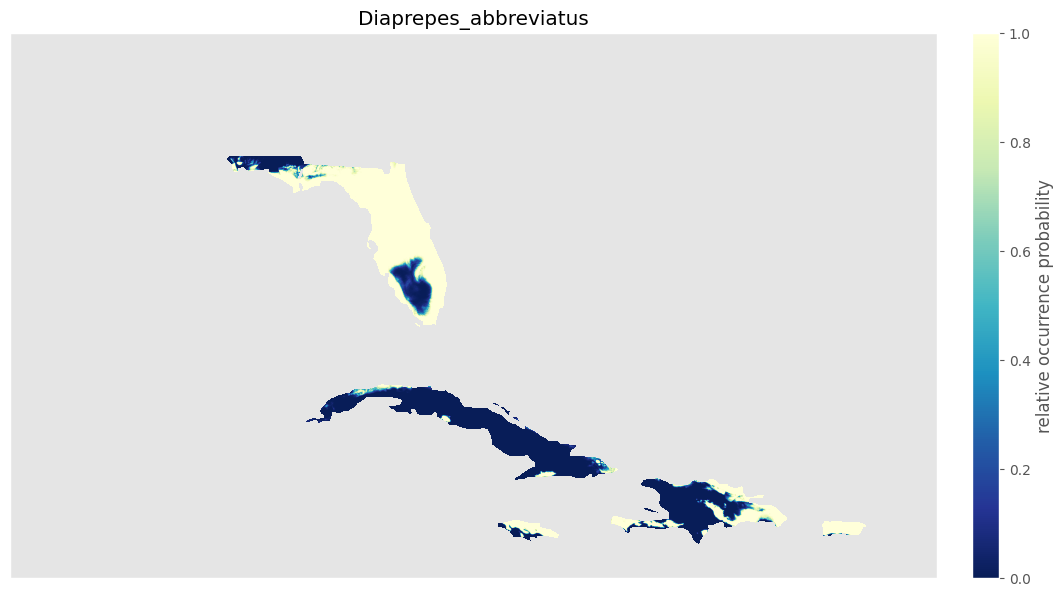

In [183]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot19 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar19 = plt.colorbar(plot19, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [184]:
# Save the colorbar as a TIFF file
colorbar_file19 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_2011_2040_for_Diaprepes_abbreviatus/Precipitation_of_Coldest_Quarter_Chelsa_Prediction_2011_2040.tif'
cbar19.ax.figure.savefig(colorbar_file19, format='tiff')

# Close the figure to free up memory
plt.close(fig)